In [1]:
points = [
    (0, 0), 
    (0.5, 0), 
    (0.5, 6.44),
    (6, 0),
    (6, 8),
    (5.5, 8),
    (5.5, 1.58),
    (0, 8)
]

In [2]:
import matplotlib.pyplot as plt
% %matplotlib inline

UsageError: Line magic function `%` not found.


In [4]:
x= [item[0] for item in points]
print(x)
y= [item[1] for item in points]
print(y)

[0, 0.5, 0.5, 6, 6, 5.5, 5.5, 0]
[0, 0, 6.44, 0, 8, 8, 1.58, 8]


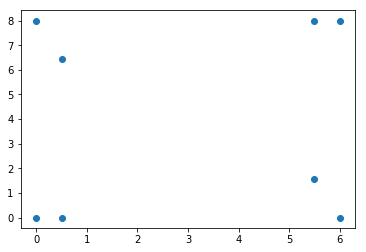

In [5]:
plt.scatter(x,y)

In [6]:
def draw_segment(segments):
    for i,seg in enumerate(segments):
        _next = segments[(i + 1) %len(segments)]
        x1,y1 = seg
        x2,y2 = _next
        plt.plot([x1,x2],[y1,y2])

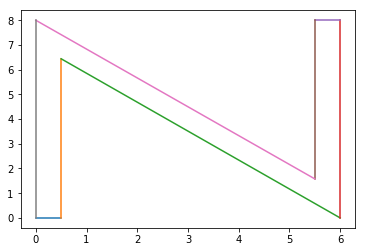

In [7]:
draw_segment(points)

In [8]:
import numpy as np

In [9]:
points_matrix = np.array(points)

In [10]:
transform = np.array([
    [1,0.4],
    [0.8,1],
])

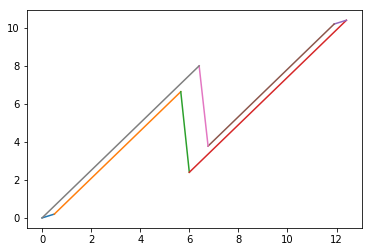

In [11]:
tranformed = np.dot(points_matrix,transform)
draw_segment(tranformed)

In [13]:
import random

In [16]:
def dice():
    return random.randint(1,6)

In [18]:
dice()

3

In [19]:
occurences = [(i,j) for i in range(1,7)
              for j in range(1,7)
             ]

In [26]:
occurences = [
    (i, j) for i in range(1, 6+1) for j in range(1, 6+1)
]
len(occurences)

36

In [20]:
len(occurences)

36

In [27]:
events = [(a,b) for a,b in occurences if a==3 or b == 3]
len(events)

11

In [28]:
events

[(1, 3),
 (2, 3),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 3),
 (5, 3),
 (6, 3)]

In [29]:
def probability(events, occurencces):
    return len(set(events)) / len(set(occurencces))
probability(events, occurences)

0.3055555555555556

In [30]:
first_is_one = [(a,b) for a,b in occurences if a==1]
len(first_is_one)

6

In [31]:
second_is_three = [(a,b) for a,b in first_is_one if b == 3]
second_is_three

[(1, 3)]

In [32]:
%matplotlib inline 
import matplotlib.pyplot as plt
from statistics import mean
from random import normalvariate, triangular, choice, vonmisesvariate, uniform

def normal(mu=0, sigma=1): return random.normalvariate(mu, sigma)

def repeated_hist(dist, n=10**6, bins=100):
    "Sample the distribution n times and make a histogram of the results."
    samples = [dist() for _ in range(n)]
    plt.hist(samples, bins=bins, normed=True)
    plt.title('{} (μ = {:.1f})'.format(dist.__name__, mean(samples)))
    plt.grid(axis='x')
    plt.yticks([], '')
    plt.show()

In [33]:
def normal(mu=0,sigam=1):
    return random.normalvariate(mu,sigam)

In [34]:
normal()

3.415877551198337

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


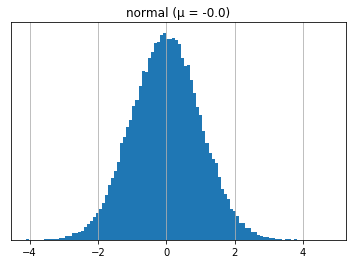

In [36]:
repeated_hist(normal,n=50000)

In [38]:
from collections import defaultdict

In [39]:
length_prices_v = {
    1: 1, 
    2: 5,
    3: 8, 
    4: 9,
    5: 10,
    6: 17,
    7: 17,
    8: 20,
    9: 24,
    10: 30
}

In [42]:
P = defaultdict(int)

for k, v in length_prices_v.items():
    P[k] = v

In [45]:
solution = {}

In [46]:
def revenue(n):

    candidates = [((0, n), P[n])] + [((cut, n-cut), revenue(cut) + revenue(n - cut)) for cut in range(1, n)]
    
    split, value = max(candidates,key=lambda x:x[1])
    
    solution[n] = split
    
    return value

In [47]:
%%time
revenue(10)

Wall time: 25.9 ms


30

In [49]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10)}

In [50]:
%pwd

'D:\\acer_workspace\\课程培训\\code'